In [1]:
# Import Necessary Libraries

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Print the version of torch we are using:
print(torch.__version__)

2.0.0+cu118


### Introduction to Tensors

#### Creating Tensors

PyTorch tensors are created using <code>torch.Tensor()</code>

In [3]:
# Tensor

scalar = torch.tensor(7)

In [4]:
scalar

tensor(7)

In [5]:
type(scalar)

torch.Tensor

In [6]:
scalar.shape

torch.Size([])

In [8]:
scalar.ndim

0

In [9]:
# Tensor as int
scalar.item()

7

In [11]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [12]:
vector.shape

torch.Size([2])

In [13]:
vector.ndim

1

Lets see **matrix**

In [14]:
# Matrix
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [15]:
MATRIX.ndim

2

In [16]:
MATRIX.shape

torch.Size([2, 2])

In [17]:
MATRIX[0]

tensor([7, 8])

In [18]:
MATRIX[1]

tensor([ 9, 10])

In [19]:
MATRIX[0][0]

tensor(7)

In [20]:
MATRIX[1][1]

tensor(10)

In [21]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [22]:
TENSOR.ndim

3

In [23]:
TENSOR.shape

torch.Size([1, 3, 3])

In [24]:
TENSOR[0][1]

tensor([3, 6, 9])

In [26]:
TENSOR[0][2]

tensor([2, 4, 5])

In [27]:
TENSOR[0][0][1]

tensor(2)

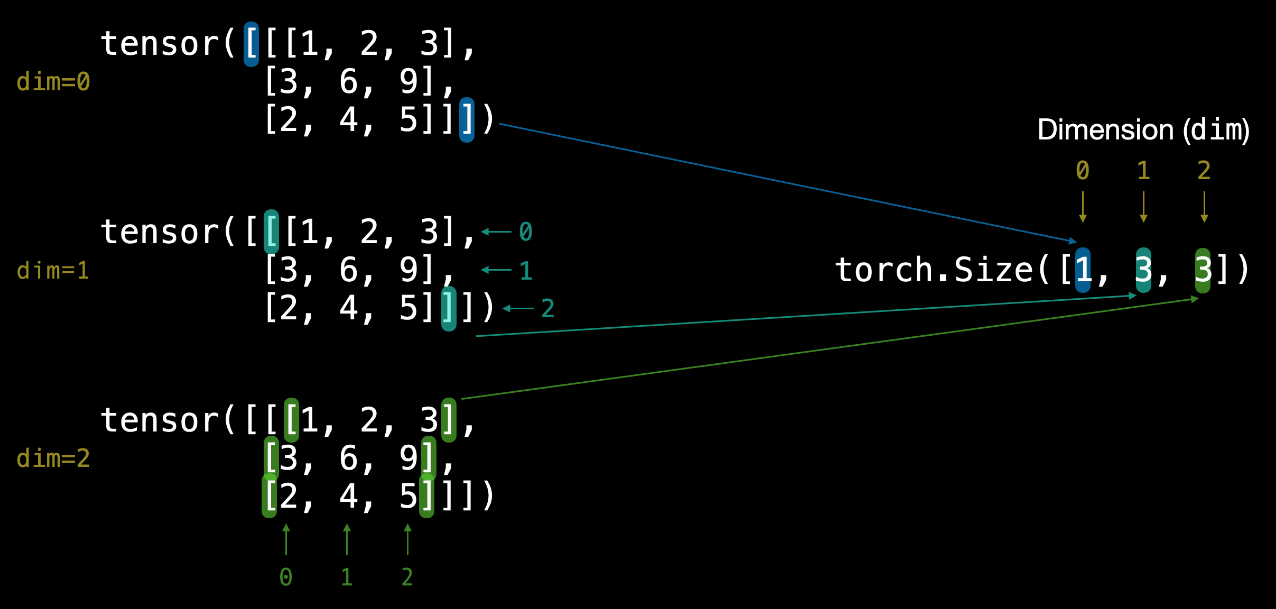

#### Random tensors

We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare WE'll create tensors by hand.

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

<code>Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...</code>

But we can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.


Let's see how to create a tensor of random numbers.

We can do so using <code>torch.rand()</code> and passing in the size parameter.

In [28]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.2040, 0.8287, 0.8513, 0.6089],
         [0.1275, 0.5922, 0.8103, 0.5821],
         [0.2636, 0.6693, 0.8545, 0.0459]]),
 torch.float32)

In [29]:
random_tensor.ndim

2

In [30]:
random_tensor.shape

torch.Size([3, 4])

The flexibility of <code>torch.rand()</code> is that we can adjust the size to be whatever we want.

For example, say we want a random tensor in the common image shape of [224, 224, 3] ([height, width, color_channels]).

In [31]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and ones

Sometimes we'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

Let's create a tensor full of zeros with [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)

Again, the `size` parameter comes into play.

In [32]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

We can do the same to create a tensor of all ones except using [`torch.ones()` ](https://pytorch.org/docs/stable/generated/torch.ones.html) instead.

In [33]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range and tensors like

Sometimes we might want a range of numbers, such as 1 to 10 or 0 to 100.

We can use `torch.arange(start, end, step)` to do so.

Where:
* `start` = start of range (e.g. 0)
* `end` = end of range (e.g. 10)
* `step` = how many steps in between each value (e.g. 1)

> **Note:** In Python, we can use `range()` to create a range. However in PyTorch, `torch.range()` is deprecated and may show an error in the future.

In [34]:
# Use torch.arange(), torch.range() is deprecated 
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

<ipython-input-34-a09072c806d9>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes we might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor. 

We can achieve this in following manner.

In [35]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

In [36]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [37]:
# Create a tensor with  dtype = torch.float16
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

### Manipulating tensors (tensor operations)

These operations are often necessary:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

### Basic operations

Let's start with a few of the fundamental operations, addition (`+`), subtraction (`-`), mutliplication (`*`).


In [38]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [39]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

Notice how the tensor values above didn't end up being `tensor([110, 120, 130])`, this is because the values inside the tensor don't change unless they're reassigned.

In [40]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

Let's subtract a number and this time we'll reassign the `tensor` variable. 

In [41]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [42]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplcation) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations. 

In [43]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [44]:
# Original tensor is still unchanged 
tensor

tensor([1, 2, 3])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [45]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Matrix multiplication (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:
1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [46]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [47]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [48]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [49]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

We can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [50]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 2.07 ms, sys: 0 ns, total: 2.07 ms
Wall time: 2.1 ms


tensor(14)

In [51]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 0 ns, sys: 96 µs, total: 96 µs
Wall time: 101 µs


tensor(14)

In [52]:
# While performing matrix multiplication, shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

We cannot multiply tensor_A with tensor_B. So, we take transpose of tensor_B.

In [53]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [54]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


We can also use <code>torch.mm</code> which is short for `torch.matmul()`

In [55]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

### Reshaping, stacking, squeezing and unsqueezing

Often times we'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`torch.Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. | 
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. | 

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if we've got shape mismatches, we'll run into errors. These methods help us make the right elements of our tensors are mixing with the right elements of other tensors. 

Let's try them out.

First, we'll create a tensor.

In [56]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`. 

In [57]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with `torch.view()`.

In [58]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too. 

In [59]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [60]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [61]:
x_stacked.shape

torch.Size([4, 7])

How about removing all single dimensions from a tensor?

To do so we can use `torch.squeeze()`

In [62]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of `torch.squeeze()`, we can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [63]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


We can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a *view* with new `dims`.

In [64]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.


### Reproducibility (trying to take the random out of random)

In [65]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.0858, 0.5950, 0.6171, 0.5632],
        [0.1259, 0.9610, 0.7359, 0.5098],
        [0.7294, 0.1841, 0.1976, 0.6266]])

Tensor B:
tensor([[0.3681, 0.9631, 0.0351, 0.8381],
        [0.7315, 0.4287, 0.9990, 0.8457],
        [0.0707, 0.2205, 0.6306, 0.2701]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [66]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])